# CSE 627 Project 1
### House Price: Advanced Regression Techniques 
### By Sooyeong Lim, Jason Zhao




# Introduction

* Why this competition?

 The Kaggle competition we chose is "House Price: Advanced Regression Techniques". We selected this competition because it satisfies the criterion of good project. Below are few reasons of justification.
 
 Firstly, we can practice a lot of feature engineering by doing this project. Feature engineering is very important in Data Science. This dataset contains a lot of features(79) with both quantitative variable and categorical variable. Also, there are many missing variables in the dataset and we can practice imputation skills as well. 
 
 Second, This project allow us to use the model we learned from class room including Regularized model and Neural Network based model and we think that it is a good idea to do hands on examples. We went further form this baseline model by adding some Ensnblem model or morden technique- Boosting model



* Project Timeline and Plan

 Fit the rough model and had a meeting with Dr. Femiani. After the first meeting, we verified that our approach valid and came up alternative ways to fit the model- NN based model fitting. But it turned out that there is some problem in the feature Engineering. Date and meeting time




* Executive Conclusion 
 The fittied model suggest that ~ have a best performance and we ended on 
 First placement-> Second Placement -> Thir Place ment

### Index 


* Exploratory Data Analysis
* Feature Engineering
* Modeling 
**1. Regularized model, 2. XGBoost, 3. Neural Network Based Model
* Results **Provide table of resutls
* Limitations/Recommendations
* Reference/Resource

### Exploratory Data Analysis

[1] Exploratory Data analysis is giving a direction of further analysis. We checked that the overall trend of data distribution and relationship between predictors and response variables and setted properdiretion for the feature engineerning and modeling.

In [3]:
# Import packages for EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
# Import train & test dataset
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
# How many distinct number of features?
# How many observations?
# Respose variable?

After importing train&test dataset, we are going to answer following questions to get to know about the problem much better- Feature:0. How many observations do we have? 1. How many number of features in the datset and how many categorical& quantitative features in the data? 2. How dose it look like the response varaible?

In [41]:
# How many observations do we have? what is concern? 
len(train.index)
len(test.index)
# We have almost equal size of train and test dataset 

1459

In [ ]:
# List of Columns and except SalePrice this 
train.columns

Correlation plot and scatter plot between ~ all features

In [ ]:
cor_mat=train.corr()
f,ax=plt.subplots(figsize=(13,10))
sns.heatmap(cor_mat,vmax=1,square=True)

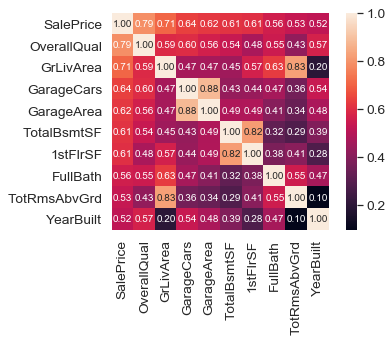

In [62]:
#Select top 10 for making prediction

k=10
cols=cor_mat.nlargest(k, 'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)

sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

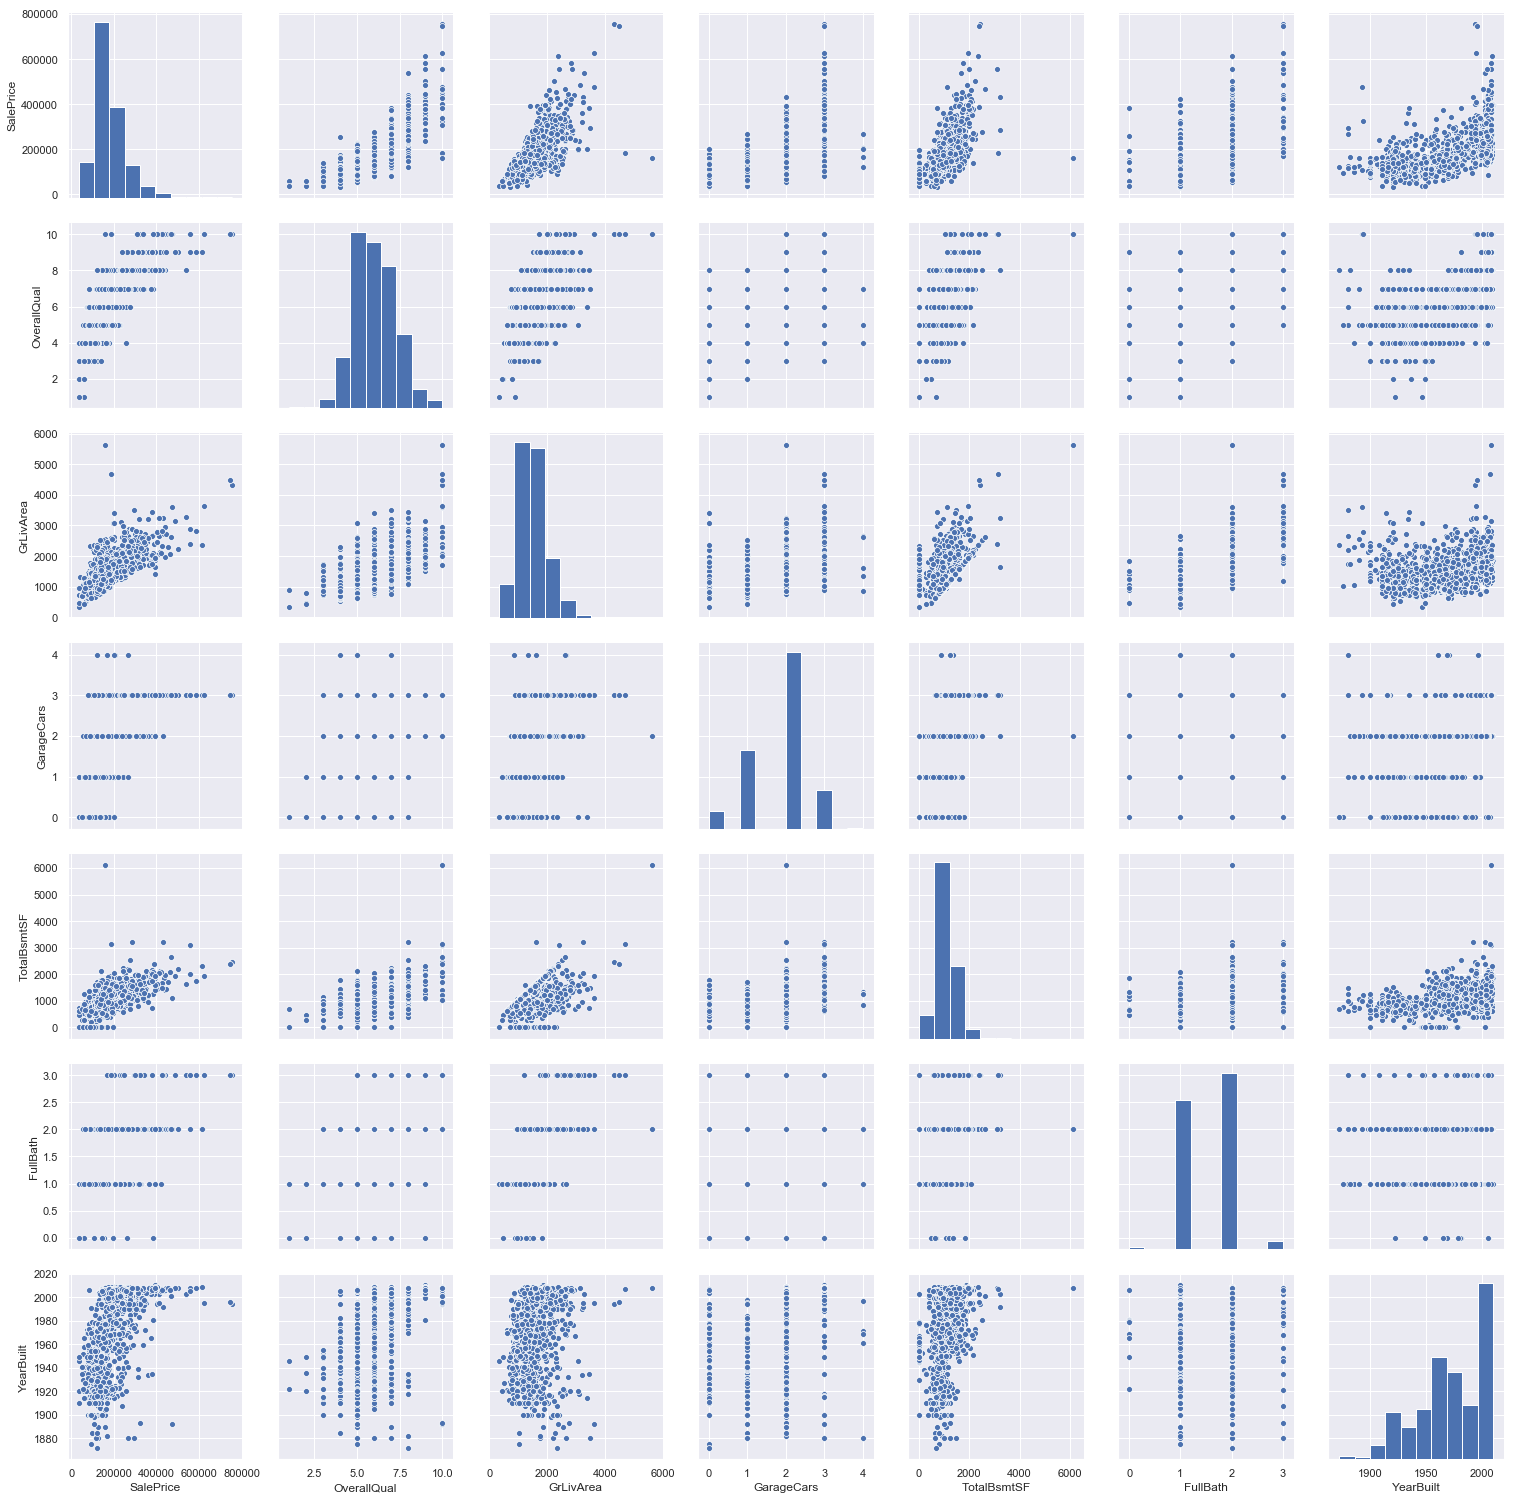

In [70]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols],size=3)
plt.show()

#Distribution of Y variable --> Take a log 
*Assumption biolation

Y~ N(XB,$\sigma^{2}$)

Normality assumption check


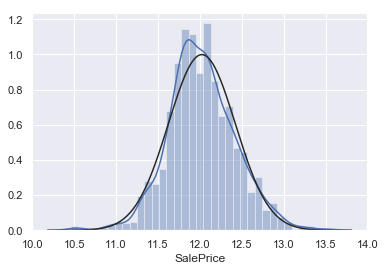

In [67]:
sns.distplot(np.log(train['SalePrice']), fit=norm)

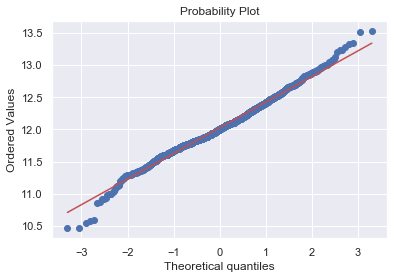

In [69]:
## QQ plot to check Normality assumption

res=stats.probplot(np.log(train['SalePrice']), plot=plt)

* Explain why noramlity assumtpion is requried

### Feature Engineering

[2] A lot of effort in Feature Engineering is needed for this problem. There are many missing observations for the train and test dataset so we imputed by using some trics. We encoded categorical variables. After plotting the dataset that we realized that the relationship between X*Y is not just linear regression. We created seperate Python file to avoid this report lengthy 

* Jason Zhao 

In [5]:
# read test data and training data
train_data = pd.read_csv("all/train.csv")
test_data = pd.read_csv("all/test.csv")

Drop Id, since it is not relevant to the selling price.

In [7]:
train_data.drop('Id',axis=1,inplace=True)

Take log of the sales price

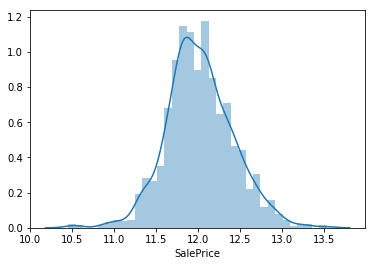

In [8]:
train_data.SalePrice = np.log1p(train_data.SalePrice)

sns.distplot(train_data['SalePrice']);

Check missing values.

In [10]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Based on data description file, we find out most of them are missing is because that house does not have that. Therefore, we will replace those by None

In [11]:
# PoolQC with NaN means no pool, so we put None instead
train_data.PoolQC = train_data.PoolQC.fillna("None")
test_data.PoolQC = test_data.PoolQC.fillna("None")

In [12]:
# MiscFeature: Miscellaneous feature not covered in other categories
# NA means None, so we repaced with None
train_data.MiscFeature = train_data.MiscFeature.fillna("None")
test_data.MiscFeature = test_data.MiscFeature.fillna("None")

In [13]:
# If Alley is NA means there is no Alley access, so we change it to None
train_data.Alley = train_data.Alley.fillna("None")
test_data.Alley = test_data.Alley.fillna("None")

In [14]:
# If Fence is NA means there is no Fence
train_data.Fence = train_data.Fence.fillna("None")
test_data.Fence = test_data.Fence.fillna("None")

In [15]:
# If FireplaceQu is NA means there is no Fireplace
train_data.FireplaceQu = train_data.FireplaceQu.fillna("None")
test_data.FireplaceQu = test_data.FireplaceQu.fillna("None")

In [16]:
# If the house does not have a garage, GarageType GarageFinish GarageQual and GarageCond will be Na
for column in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [17]:
# If there is no basement, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual will be Na,
for column in ("BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual"):
    train_data[column] = train_data[column].fillna("None")
    test_data[column] = test_data[column] .fillna("None")

In [18]:
# Masonry veneer type
train_data.MasVnrType = train_data.MasVnrType.fillna("None")
test_data.MasVnrType = test_data.MasVnrType.fillna("None")

In [22]:
# since there is no garage, so we will set the year build at 0
train_data.GarageYrBlt = train_data.GarageYrBlt.fillna(0)
test_data.GarageYrBlt = test_data.GarageYrBlt.fillna(0)

# for testing data, GarageArea and GarageCars also has missing vlaue, we set them to 0 because they does not have garage
test_data.GarageArea = test_data.GarageArea.fillna(0)
test_data.GarageCars = test_data.GarageCars.fillna(0)

In [25]:
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)
test_data["MasVnrArea"] = test_data['MasVnrArea'].fillna(0)

In [26]:
test_data["TotalBsmtSF"] = test_data['TotalBsmtSF'].fillna(0)
test_data["BsmtFinSF1"] = test_data['BsmtFinSF1'].fillna(0)
test_data["BsmtFinSF2"] = test_data['BsmtFinSF2'].fillna(0)
test_data["BsmtUnfSF"] = test_data['BsmtUnfSF'].fillna(0)

After replacing, we check which data are still missing.

In [27]:
# check the missing data rate
train_data_na = (train_data.isnull().sum() / len(train_data)) * 100
train_data_na = train_data_na.drop(train_data_na[train_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_data_na})
missing_data

,Missing Ratio
LotFrontage,17.739726
Electrical,0.068493


We want to encode every string data to check correlations.

In [29]:
list(train_data.select_dtypes(exclude=['int', 'float']).columns.values)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
train_data.MSZoning = train_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})
test_data.MSZoning = test_data.MSZoning.map({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})

In [31]:
train_data.Street = train_data.Street.map({'Grvl' : 1, 'Pave' : 2})
test_data.Street = test_data.Street.map({'Grvl' : 1, 'Pave' : 2})

In [32]:
train_data.Alley = train_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})
test_data.Alley = test_data.Alley.map({'None':0, 'Grvl' : 1, 'Pave' : 2})

In [33]:
train_data.LotShape = train_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})
test_data.LotShape = test_data.LotShape.map({"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4})

In [34]:
train_data.LandContour = train_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})
test_data.LandContour = test_data.LandContour.map({
    'Lvl' : 1,
    'Bnk' : 2,
    'HLS' : 3,
    'Low' : 4
})

In [35]:
train_data.Utilities = train_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})
test_data.Utilities = test_data.Utilities.map({
    'AllPub' : 1,
    'NoSewr' : 2,
    'NoSeWa' : 3,
    'ELO' :4
})

In [36]:
train_data.LotConfig = train_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})
test_data.LotConfig = test_data.LotConfig.map({
    'Inside' : 1,
    'Corner' : 2,
    'CulDSac' : 3,
    'FR2' : 4,
    'FR3' : 5
})

In [37]:
train_data.LandSlope = train_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})
test_data.LandSlope = test_data.LandSlope.map({
    'Gtl' : 3,
    'Mod' : 2,
    'Sev' : 1
})

In [38]:
Neighborhoodkeys =  train_data.Neighborhood.unique()
NeighborhoodMap = {}
i = 1
for key in Neighborhoodkeys:
    NeighborhoodMap[key] = i
    i += 1

In [39]:
train_data.Neighborhood = train_data.Neighborhood.map(NeighborhoodMap)
test_data.Neighborhood = test_data.Neighborhood.map(NeighborhoodMap)

In [40]:
ConditionMap = {'Norm': 3, 'Feedr': 4, 'PosN': 2, 'Artery': 4, 'RRAe': 1, 'RRNn': 1, 'RRAn': 1, 'PosA': 2, 'RRNe': 1}

train_data.Condition1 = train_data.Condition1.map(ConditionMap)
train_data.Condition2 = train_data.Condition2.map(ConditionMap)
test_data.Condition1 = test_data.Condition1.map(ConditionMap)
test_data.Condition2 = test_data.Condition2.map(ConditionMap)

In [41]:
train_data.BldgType = train_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})
test_data.BldgType = test_data.BldgType.map({'1Fam': 5, '2FmCon' :4, 'Duplx' :3, 'TwnhsE': 2, 'TwnhsI':1})

In [42]:
train_data.HouseStyle = train_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})
test_data.HouseStyle = test_data.HouseStyle.map({'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8})

In [43]:
train_data.RoofStyle = train_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})
test_data.RoofStyle = test_data.RoofStyle.map({'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6})

In [44]:
train_data.RoofMatl = train_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})
test_data.RoofMatl = test_data.RoofMatl.map({'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 'Membran': 5, 'Tar&Grv': 6, 'Roll': 7, 'ClyTile': 8})

In [45]:
ExteriorMap = {'VinylSd': 1, 'MetalSd': 2, 'Wd Sdng': 3, 'HdBoard': 4, 'BrkFace': 5, 'WdShing': 6, 'CemntBd': 7, 'Plywood': 8, 'AsbShng': 9, 'Stucco': 10, 'BrkComm': 11, 'AsphShn': 12, 'Stone': 13, 'ImStucc': 14, 'CBlock': 15}
train_data.Exterior1st = train_data.Exterior1st.map(ExteriorMap)
train_data.Exterior2nd = train_data.Exterior2nd.map(ExteriorMap)
test_data.Exterior1st = test_data.Exterior1st.map(ExteriorMap)
test_data.Exterior2nd = test_data.Exterior2nd.map(ExteriorMap)

In [46]:
# since has none, so we just samplify this featrue
train_data.MasVnrType = train_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})
test_data.MasVnrType = test_data.MasVnrType.map({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, "Stone" : 1, "None" : 0})

In [47]:
conditionMap = {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5}

In [48]:
train_data.ExterCond = train_data.ExterCond.map(conditionMap)
test_data.ExterCond = test_data.ExterCond.map(conditionMap)
train_data.ExterQual = train_data.ExterQual.map(conditionMap)
test_data.ExterQual = test_data.ExterQual.map(conditionMap)
train_data.BsmtQual = train_data.BsmtQual.map(conditionMap)
test_data.BsmtQual = test_data.BsmtQual.map(conditionMap)
train_data.BsmtCond = train_data.BsmtCond.map(conditionMap)
test_data.BsmtCond = test_data.BsmtCond.map(conditionMap)
train_data.HeatingQC = train_data.HeatingQC.map(conditionMap)
test_data.HeatingQC = test_data.HeatingQC.map(conditionMap)
train_data.KitchenQual = train_data.KitchenQual.map(conditionMap)
test_data.KitchenQual = test_data.KitchenQual.map(conditionMap)
train_data.FireplaceQu = train_data.FireplaceQu.map(conditionMap)
test_data.FireplaceQu = test_data.FireplaceQu.map(conditionMap)
train_data.GarageQual = train_data.GarageQual.map(conditionMap)
test_data.GarageQual = test_data.GarageQual.map(conditionMap)
train_data.GarageCond = train_data.GarageCond.map(conditionMap)
test_data.GarageCond = test_data.GarageCond.map(conditionMap)
train_data.PoolQC = train_data.PoolQC.map(conditionMap)
test_data.PoolQC = test_data.PoolQC.map(conditionMap)


In [49]:
train_data.Foundation = train_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})
test_data.Foundation = test_data.Foundation.map({'PConc': 1, 'CBlock': 2, 'BrkTil': 3, 'Wood': 4, 'Slab': 5, 'Stone': 6})

In [50]:
train_data.BsmtExposure = train_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})
test_data.BsmtExposure = test_data.BsmtExposure.map({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3, "None" : 0})

In [51]:
BsmtFinTypeMap = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}

In [52]:
train_data.BsmtFinType1 = train_data.BsmtFinType1.map(BsmtFinTypeMap)
train_data.BsmtFinType2 = train_data.BsmtFinType2.map(BsmtFinTypeMap)
test_data.BsmtFinType1 = test_data.BsmtFinType1.map(BsmtFinTypeMap)
test_data.BsmtFinType2 = test_data.BsmtFinType2.map(BsmtFinTypeMap)

In [53]:
train_data.Heating = train_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})
test_data.Heating = test_data.Heating.map({'GasA': 1, 'GasW': 2, 'Grav': 3, 'Wall': 4, 'OthW': 5, 'Floor': 6})

In [54]:
train_data.CentralAir = train_data.CentralAir.map({'Y': 1, 'N': 0})
test_data.CentralAir = test_data.CentralAir.map({'Y': 1, 'N': 0})

In [55]:
train_data.Electrical = train_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})
test_data.Electrical = test_data.Electrical.map({'SBrkr': 1, 'FuseF': 2, 'FuseA': 3, 'FuseP': 4, 'Mix': 5})

In [56]:
train_data.Functional = train_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})
test_data.Functional = test_data.Functional.map({'Typ':0, 'Min2':1, 'Min1':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6})

In [57]:
train_data.GarageType = train_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})
test_data.GarageType = test_data.GarageType.map({'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'None':0, 'Basement':4, 'CarPort':5, '2Types':6})

In [58]:
train_data.GarageFinish = train_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})
test_data.GarageFinish = test_data.GarageFinish.map({'RFn': 1, 'Unf': 2, 'Fin': 3, 'None': 0})

In [59]:
train_data.PavedDrive = train_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})
test_data.PavedDrive = test_data.PavedDrive.map({'Y':3, 'N':1, 'P':2})

In [60]:
train_data.Fence = train_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})
test_data.Fence = test_data.Fence.map({'None':0, 'MnPrv':1, 'GdPrv':2, 'GdWo':3, 'MnWw':4})

In [61]:
train_data.MiscFeature = train_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})
test_data.MiscFeature = test_data.MiscFeature.map({'None':0, 'Shed':1, 'Othr':2, 'Gar2':3, 'TenC':4})

In [62]:
train_data.SaleType = train_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})
test_data.SaleType = test_data.SaleType.map({'WD': 1, 'New': 2, 'COD': 3, 'ConLD': 4, 'ConLI': 5, 'CWD': 6, 'ConLw': 7, 'Con': 8, 'Oth': 9})

In [63]:
train_data.SaleCondition = train_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})
test_data.SaleCondition = test_data.SaleCondition.map({'Normal': 1, 'Abnorml': 2, 'Partial': 3, 'AdjLand': 4, 'Alloca': 5, 'Family': 6})

After enconding, all of features' datatype has became int or float.

We tried to inpute those missing value, but after inpute, all datatype has bcame float which cause more problem, so we just chose to fill those data by mean value.

In [65]:
train_data=train_data.fillna(train_data.median())
test_data=test_data.fillna(test_data.median())

In [66]:
correlated = train_data.corr()
correlated = correlated.loc['SalePrice']
correlated = correlated.sort_values(ascending=False)

print(correlated.head(15))


SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
ExterQual       0.678840
KitchenQual     0.667893
GarageArea      0.650888
BsmtQual        0.615804
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
FireplaceQu     0.546362
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64


### Modeling

[3] Firstly, we fitted Regularized Linear model by using Ridge regression (L2) Regularization and checked it's performance. And tried to apply Elastic net which is ensenble model of L1(Lasso) regression with L2. After fitting this regression file, we also used Neural Network based model by using Pytorch
Firt trial, Second trial, Third Trial.. Feature engineering again, Grid search

In [70]:
# Import needed libaries
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge

In [71]:
#Get labels by select SalePrice
y_log=train_data['SalePrice']
train_data.drop('SalePrice',axis=1,inplace=True)

In [72]:
from sklearn.model_selection import cross_val_score, train_test_split

In [73]:
# Partition the dataset in test + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y_log, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))
#Define 70% is used as testing data and 30% is test dataset.

X_train : (1022, 79)
X_test : (438, 79)
y_train : (1022,)
y_test : (438,)


## xgboost

In [67]:
import xgboost

In [68]:
# Create an xgboost model with leaning rate 0.05
model_xgb = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.05) 

In [74]:
# Training
model_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:10.9595
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:10.413
[2]	validation_0-rmse:9.89394
[3]	validation_0-rmse:9.40081
[4]	validation_0-rmse:8.93235
[5]	validation_0-rmse:8.48733
[6]	validation_0-rmse:8.06407
[7]	validation_0-rmse:7.66195
[8]	validation_0-rmse:7.27993
[9]	validation_0-rmse:6.91859
[10]	validation_0-rmse:6.57376
[11]	validation_0-rmse:6.24736
[12]	validation_0-rmse:5.93612
[13]	validation_0-rmse:5.6418
[14]	validation_0-rmse:5.36147
[15]	validation_0-rmse:5.09426
[16]	validation_0-rmse:4.84114
[17]	validation_0-rmse:4.60025
[18]	validation_0-rmse:4.37261
[19]	validation_0-rmse:4.15501
[20]	validation_0-rmse:3.94885
[21]	validation_0-rmse:3.75236
[22]	validation_0-rmse:3.56642
[23]	validation_0-rmse:3.38932
[24]	validation_0-rmse:3.22199
[25]	validation_0-rmse:3.06274
[26]	validation_0-rmse:2.91055
[27]	validation_0-rmse:2.76616
[28]	validation_0-rmse:2.62962
[29]	validation_0-rmse:2.50006
[30]	validation_0

[253]	validation_0-rmse:0.124613
[254]	validation_0-rmse:0.124551
[255]	validation_0-rmse:0.124523
[256]	validation_0-rmse:0.124505
[257]	validation_0-rmse:0.12447
[258]	validation_0-rmse:0.124435
[259]	validation_0-rmse:0.12442
[260]	validation_0-rmse:0.124419
[261]	validation_0-rmse:0.124368
[262]	validation_0-rmse:0.124377
[263]	validation_0-rmse:0.124368
[264]	validation_0-rmse:0.124361
[265]	validation_0-rmse:0.12436
[266]	validation_0-rmse:0.124313
[267]	validation_0-rmse:0.124285
[268]	validation_0-rmse:0.124302
[269]	validation_0-rmse:0.124285
[270]	validation_0-rmse:0.124237
[271]	validation_0-rmse:0.12414
[272]	validation_0-rmse:0.124184
[273]	validation_0-rmse:0.124152
[274]	validation_0-rmse:0.124108
[275]	validation_0-rmse:0.124069
[276]	validation_0-rmse:0.12402
[277]	validation_0-rmse:0.124087
[278]	validation_0-rmse:0.124123
[279]	validation_0-rmse:0.124112
[280]	validation_0-rmse:0.124108
[281]	validation_0-rmse:0.124098
[282]	validation_0-rmse:0.124088
[283]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [75]:
y_test_xgb_ela = model_xgb.predict(X_test)

### Keras

In [77]:
import keras

Using TensorFlow backend.


In [78]:
seed = 7
np.random.seed(seed)

In [79]:
# Create a model and add layers
kerasModel = keras.models.Sequential()

kerasModel.add(keras.layers.Dense(500, input_dim = X_train.shape[1],activation='relu'))
kerasModel.add(keras.layers.Dense(400,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(100,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(300,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(200,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(50,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(25,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(12,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(6,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(25,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(12,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(6,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(3,kernel_initializer='normal',activation='relu'))
kerasModel.add(keras.layers.Dense(1,kernel_initializer='normal'))
kerasModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               40000     
_________________________________________________________________
dense_2 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 300)               15300     
__________

In [80]:
# Define another loss function
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [81]:
# Set loss function and optimizer
kerasModel.compile(loss = 'mse', optimizer = "adam")

In [82]:
# Set callback function which will ealystop when val_loss does not become better in 50 epochs
# save the best model
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=50),
            keras.callbacks.ModelCheckpoint('best.h5', monitor='val_loss', save_best_only=True, mode='min')]

In [83]:
# Train
history = kerasModel.fit(X_train, y_train, epochs=5000, validation_data = (X_test, y_test))

Train on 1022 samples, validate on 438 samples
Epoch 1/5000
1022/1022 [==============================] - 7s 7ms/step - loss: 144.3165 - val_loss: 144.0025
Epoch 2/5000
1022/1022 [==============================] - 0s 237us/step - loss: 122.4602 - val_loss: 50.9274
Epoch 3/5000
1022/1022 [==============================] - 0s 246us/step - loss: 120.6116 - val_loss: 82.5146
Epoch 4/5000
1022/1022 [==============================] - 0s 227us/step - loss: 17.4030 - val_loss: 2.4667
Epoch 5/5000
1022/1022 [==============================] - 0s 234us/step - loss: 1.7298 - val_loss: 1.7056
Epoch 6/5000
1022/1022 [==============================] - 0s 233us/step - loss: 1.0380 - val_loss: 1.1055
Epoch 7/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.7380 - val_loss: 0.7540
Epoch 8/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.5311 - val_loss: 0.5468
Epoch 9/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.3668 - val_los

1022/1022 [==============================] - 0s 237us/step - loss: 0.0638 - val_loss: 0.0775
Epoch 78/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.1074 - val_loss: 0.2849
Epoch 79/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.1163 - val_loss: 0.2887
Epoch 80/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0747 - val_loss: 0.0695
Epoch 81/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.0668 - val_loss: 0.2216
Epoch 82/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.1042 - val_loss: 0.1106
Epoch 83/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0416 - val_loss: 0.1229
Epoch 84/5000
1022/1022 [==============================] - 0s 258us/step - loss: 0.0547 - val_loss: 0.0698
Epoch 85/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0490 - val_loss: 0.0784
Epoch 86/5000
1022/1022 [==========================

Epoch 229/5000
1022/1022 [==============================] - 0s 220us/step - loss: 0.0540 - val_loss: 0.0320
Epoch 230/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.2085 - val_loss: 0.1328
Epoch 231/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.5633 - val_loss: 0.5899
Epoch 232/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.2309 - val_loss: 0.4453
Epoch 233/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.1143 - val_loss: 0.1809
Epoch 234/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0488 - val_loss: 0.0364
Epoch 235/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0608 - val_loss: 0.0583
Epoch 236/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0393 - val_loss: 0.0745
Epoch 237/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0421 - val_loss: 0.0360
Epoch 238/5000
1022/1022 [==

Epoch 305/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0364 - val_loss: 0.0280
Epoch 306/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0380 - val_loss: 0.0413
Epoch 307/5000
1022/1022 [==============================] - 0s 218us/step - loss: 0.0605 - val_loss: 0.0252
Epoch 308/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0353 - val_loss: 0.0363
Epoch 309/5000
1022/1022 [==============================] - 0s 243us/step - loss: 0.0401 - val_loss: 0.0310
Epoch 310/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0549 - val_loss: 0.1819
Epoch 311/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.1097 - val_loss: 0.0394
Epoch 312/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0351 - val_loss: 0.0221
Epoch 313/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0342 - val_loss: 0.0927
Epoch 314/5000
1022/1022 [==

Epoch 381/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0551 - val_loss: 0.0218
Epoch 382/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.0409 - val_loss: 0.0224
Epoch 383/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0581 - val_loss: 0.0597
Epoch 384/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0297 - val_loss: 0.0514
Epoch 385/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0560 - val_loss: 0.0338
Epoch 386/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0288 - val_loss: 0.0314
Epoch 387/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0748 - val_loss: 0.3045
Epoch 388/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.2555 - val_loss: 0.0209
Epoch 389/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0729 - val_loss: 0.0711
Epoch 390/5000
1022/1022 [==

Epoch 457/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0543 - val_loss: 0.0386
Epoch 458/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0633 - val_loss: 0.0283
Epoch 459/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0313 - val_loss: 0.1134
Epoch 460/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0400 - val_loss: 0.0282
Epoch 461/5000
1022/1022 [==============================] - 0s 234us/step - loss: 0.0314 - val_loss: 0.0314
Epoch 462/5000
1022/1022 [==============================] - 0s 219us/step - loss: 0.0518 - val_loss: 0.0272
Epoch 463/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0236 - val_loss: 0.0527
Epoch 464/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0606 - val_loss: 0.0255
Epoch 465/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0463 - val_loss: 0.0248
Epoch 466/5000
1022/1022 [==

Epoch 533/5000
1022/1022 [==============================] - 0s 243us/step - loss: 0.0300 - val_loss: 0.0395
Epoch 534/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0316 - val_loss: 0.0348
Epoch 535/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0317 - val_loss: 0.0310
Epoch 536/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0226 - val_loss: 0.0675
Epoch 537/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0316 - val_loss: 0.0289
Epoch 538/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0349 - val_loss: 0.0589
Epoch 539/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0343 - val_loss: 0.0460
Epoch 540/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0311 - val_loss: 0.0286
Epoch 541/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0216 - val_loss: 0.0245
Epoch 542/5000
1022/1022 [==

Epoch 609/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0588 - val_loss: 0.0626
Epoch 610/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0268 - val_loss: 0.0285
Epoch 611/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0471 - val_loss: 0.0229
Epoch 612/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0226 - val_loss: 0.0333
Epoch 613/5000
1022/1022 [==============================] - 0s 235us/step - loss: 0.0394 - val_loss: 0.0323
Epoch 614/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0357 - val_loss: 0.0373
Epoch 615/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.0189 - val_loss: 0.0587
Epoch 616/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0385 - val_loss: 0.0499
Epoch 617/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0487 - val_loss: 0.0253
Epoch 618/5000
1022/1022 [==

Epoch 685/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0281 - val_loss: 0.0594
Epoch 686/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0327 - val_loss: 0.1212
Epoch 687/5000
1022/1022 [==============================] - 0s 219us/step - loss: 0.0830 - val_loss: 0.0666
Epoch 688/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0400 - val_loss: 0.0405
Epoch 689/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0406 - val_loss: 0.0244
Epoch 690/5000
1022/1022 [==============================] - 0s 240us/step - loss: 0.0221 - val_loss: 0.0249
Epoch 691/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0208 - val_loss: 0.0250
Epoch 692/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0431 - val_loss: 0.0339
Epoch 693/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0503 - val_loss: 0.0468
Epoch 694/5000
1022/1022 [==

Epoch 761/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0204 - val_loss: 0.0292
Epoch 762/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0578 - val_loss: 0.1476
Epoch 763/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.1753 - val_loss: 0.2868
Epoch 764/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0862 - val_loss: 0.0367
Epoch 765/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0378 - val_loss: 0.0280
Epoch 766/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.0424 - val_loss: 0.2015
Epoch 767/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0511 - val_loss: 0.0285
Epoch 768/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0259 - val_loss: 0.0391
Epoch 769/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0257 - val_loss: 0.0351
Epoch 770/5000
1022/1022 [==

Epoch 837/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0309 - val_loss: 0.0269
Epoch 838/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0231 - val_loss: 0.0277
Epoch 839/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0242 - val_loss: 0.0267
Epoch 840/5000
1022/1022 [==============================] - 0s 234us/step - loss: 0.0362 - val_loss: 0.0392
Epoch 841/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.1722 - val_loss: 0.3556
Epoch 842/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.1576 - val_loss: 0.0601
Epoch 843/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.0488 - val_loss: 0.1003
Epoch 844/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0412 - val_loss: 0.0286
Epoch 845/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0303 - val_loss: 0.0308
Epoch 846/5000
1022/1022 [==

Epoch 913/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0319 - val_loss: 0.0418
Epoch 914/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0570 - val_loss: 0.0312
Epoch 915/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0197 - val_loss: 0.0280
Epoch 916/5000
1022/1022 [==============================] - 0s 234us/step - loss: 0.1049 - val_loss: 0.2611
Epoch 917/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.1285 - val_loss: 0.0699
Epoch 918/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0505 - val_loss: 0.2014
Epoch 919/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.2564 - val_loss: 0.0908
Epoch 920/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0377 - val_loss: 0.0587
Epoch 921/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0345 - val_loss: 0.0306
Epoch 922/5000
1022/1022 [==

Epoch 989/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0535 - val_loss: 0.0615
Epoch 990/5000
1022/1022 [==============================] - 0s 241us/step - loss: 0.0205 - val_loss: 0.0333
Epoch 991/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0186 - val_loss: 0.0248
Epoch 992/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0335 - val_loss: 0.0340
Epoch 993/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0266 - val_loss: 0.0280
Epoch 994/5000
1022/1022 [==============================] - 0s 240us/step - loss: 0.0331 - val_loss: 0.0619
Epoch 995/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0803 - val_loss: 0.2528
Epoch 996/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.1660 - val_loss: 0.5057
Epoch 997/5000
1022/1022 [==============================] - 0s 242us/step - loss: 0.1102 - val_loss: 0.0368
Epoch 998/5000
1022/1022 [==

1022/1022 [==============================] - 0s 238us/step - loss: 0.0187 - val_loss: 0.0348
Epoch 1140/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0339 - val_loss: 0.0320
Epoch 1141/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0246 - val_loss: 0.0403
Epoch 1142/5000
1022/1022 [==============================] - 0s 245us/step - loss: 0.0149 - val_loss: 0.0434
Epoch 1143/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0185 - val_loss: 0.0440
Epoch 1144/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0390 - val_loss: 0.0399
Epoch 1145/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0223 - val_loss: 0.0495
Epoch 1146/5000
1022/1022 [==============================] - 0s 240us/step - loss: 0.0230 - val_loss: 0.0385
Epoch 1147/5000
1022/1022 [==============================] - 0s 254us/step - loss: 0.0357 - val_loss: 0.0348
Epoch 1148/5000
1022/1022 [========

1022/1022 [==============================] - 0s 238us/step - loss: 0.0246 - val_loss: 0.0520
Epoch 1290/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0508 - val_loss: 0.1293
Epoch 1291/5000
1022/1022 [==============================] - 0s 260us/step - loss: 0.0338 - val_loss: 0.0373
Epoch 1292/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0152 - val_loss: 0.0596
Epoch 1293/5000
1022/1022 [==============================] - 0s 253us/step - loss: 0.0264 - val_loss: 0.0983
Epoch 1294/5000
1022/1022 [==============================] - 0s 237us/step - loss: 0.0304 - val_loss: 0.0282
Epoch 1295/5000
1022/1022 [==============================] - 0s 254us/step - loss: 0.0169 - val_loss: 0.0295
Epoch 1296/5000
1022/1022 [==============================] - 0s 240us/step - loss: 0.0156 - val_loss: 0.0288
Epoch 1297/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0149 - val_loss: 0.0288
Epoch 1298/5000
1022/1022 [========

1022/1022 [==============================] - 0s 235us/step - loss: 0.0201 - val_loss: 0.0290
Epoch 1440/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0213 - val_loss: 0.0315
Epoch 1441/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0121 - val_loss: 0.0271
Epoch 1442/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0187 - val_loss: 0.0309
Epoch 1443/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0172 - val_loss: 0.0314
Epoch 1444/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.0151 - val_loss: 0.0510
Epoch 1445/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0141 - val_loss: 0.0350
Epoch 1446/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0205 - val_loss: 0.0306
Epoch 1447/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0109 - val_loss: 0.0279
Epoch 1448/5000
1022/1022 [========

1022/1022 [==============================] - 0s 234us/step - loss: 0.0163 - val_loss: 0.0325
Epoch 1590/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0167 - val_loss: 0.0290
Epoch 1591/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0123 - val_loss: 0.0293
Epoch 1592/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.0118 - val_loss: 0.0301
Epoch 1593/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0134 - val_loss: 0.0366
Epoch 1594/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0148 - val_loss: 0.0498
Epoch 1595/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0146 - val_loss: 0.0294
Epoch 1596/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0133 - val_loss: 0.0974
Epoch 1597/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0342 - val_loss: 0.0812
Epoch 1598/5000
1022/1022 [========

1022/1022 [==============================] - 0s 244us/step - loss: 0.0097 - val_loss: 0.0324
Epoch 1740/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0204 - val_loss: 0.0715
Epoch 1741/5000
1022/1022 [==============================] - 0s 220us/step - loss: 0.0247 - val_loss: 0.0365
Epoch 1742/5000
1022/1022 [==============================] - 0s 237us/step - loss: 0.0151 - val_loss: 0.0385
Epoch 1743/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0245 - val_loss: 0.0490
Epoch 1744/5000
1022/1022 [==============================] - 0s 260us/step - loss: 0.0265 - val_loss: 0.0296
Epoch 1745/5000
1022/1022 [==============================] - 0s 243us/step - loss: 0.0488 - val_loss: 0.0509
Epoch 1746/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0352 - val_loss: 0.0632
Epoch 1747/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0174 - val_loss: 0.0409
Epoch 1748/5000
1022/1022 [========

1022/1022 [==============================] - 0s 226us/step - loss: 0.0230 - val_loss: 0.1065
Epoch 1890/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0680 - val_loss: 0.0279
Epoch 1891/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0128 - val_loss: 0.0273
Epoch 1892/5000
1022/1022 [==============================] - 0s 237us/step - loss: 0.0248 - val_loss: 0.0399
Epoch 1893/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0178 - val_loss: 0.0573
Epoch 1894/5000
1022/1022 [==============================] - 0s 237us/step - loss: 0.0357 - val_loss: 0.0315
Epoch 1895/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0320 - val_loss: 0.0413
Epoch 1896/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0282 - val_loss: 0.0486
Epoch 1897/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0127 - val_loss: 0.0334
Epoch 1898/5000
1022/1022 [========

1022/1022 [==============================] - 0s 245us/step - loss: 0.0223 - val_loss: 0.0308
Epoch 2040/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.0341 - val_loss: 0.0357
Epoch 2041/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0287 - val_loss: 0.0523
Epoch 2042/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0291 - val_loss: 0.0298
Epoch 2043/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0148 - val_loss: 0.0375
Epoch 2044/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0154 - val_loss: 0.0600
Epoch 2045/5000
1022/1022 [==============================] - 0s 246us/step - loss: 0.0111 - val_loss: 0.0285
Epoch 2046/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.0125 - val_loss: 0.0281
Epoch 2047/5000
1022/1022 [==============================] - 0s 245us/step - loss: 0.0452 - val_loss: 0.0517
Epoch 2048/5000
1022/1022 [========

1022/1022 [==============================] - 0s 236us/step - loss: 0.0290 - val_loss: 0.0375
Epoch 2190/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0560 - val_loss: 0.0800
Epoch 2191/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0471 - val_loss: 0.0347
Epoch 2192/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0190 - val_loss: 0.0279
Epoch 2193/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0239 - val_loss: 0.0452
Epoch 2194/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0147 - val_loss: 0.0387
Epoch 2195/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.0143 - val_loss: 0.0381
Epoch 2196/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0123 - val_loss: 0.0311
Epoch 2197/5000
1022/1022 [==============================] - 0s 237us/step - loss: 0.0199 - val_loss: 0.0317
Epoch 2198/5000
1022/1022 [========

1022/1022 [==============================] - 0s 238us/step - loss: 0.0175 - val_loss: 0.0349
Epoch 2340/5000
1022/1022 [==============================] - 0s 250us/step - loss: 0.0152 - val_loss: 0.0499
Epoch 2341/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0167 - val_loss: 0.0377
Epoch 2342/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0198 - val_loss: 0.0303
Epoch 2343/5000
1022/1022 [==============================] - 0s 222us/step - loss: 0.0112 - val_loss: 0.0334
Epoch 2344/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0126 - val_loss: 0.0556
Epoch 2345/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0179 - val_loss: 0.0368
Epoch 2346/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0102 - val_loss: 0.0399
Epoch 2347/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0097 - val_loss: 0.0298
Epoch 2348/5000
1022/1022 [========

1022/1022 [==============================] - 0s 233us/step - loss: 0.0116 - val_loss: 0.0313
Epoch 2490/5000
1022/1022 [==============================] - 0s 234us/step - loss: 0.0134 - val_loss: 0.0285
Epoch 2491/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0087 - val_loss: 0.0441
Epoch 2492/5000
1022/1022 [==============================] - 0s 240us/step - loss: 0.0155 - val_loss: 0.0331
Epoch 2493/5000
1022/1022 [==============================] - 0s 219us/step - loss: 0.0241 - val_loss: 0.0761
Epoch 2494/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0283 - val_loss: 0.0601
Epoch 2495/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0149 - val_loss: 0.0294
Epoch 2496/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0100 - val_loss: 0.0289
Epoch 2497/5000
1022/1022 [==============================] - 0s 220us/step - loss: 0.0121 - val_loss: 0.0308
Epoch 2498/5000
1022/1022 [========

1022/1022 [==============================] - 0s 234us/step - loss: 0.0153 - val_loss: 0.0400
Epoch 2640/5000
1022/1022 [==============================] - 0s 240us/step - loss: 0.0095 - val_loss: 0.0351
Epoch 2641/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0342 - val_loss: 0.0917
Epoch 2642/5000
1022/1022 [==============================] - 0s 242us/step - loss: 0.0797 - val_loss: 0.0569
Epoch 2643/5000
1022/1022 [==============================] - 0s 219us/step - loss: 0.0199 - val_loss: 0.0300
Epoch 2644/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0109 - val_loss: 0.0363
Epoch 2645/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0084 - val_loss: 0.0293
Epoch 2646/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0151 - val_loss: 0.0408
Epoch 2647/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0221 - val_loss: 0.0290
Epoch 2648/5000
1022/1022 [========

1022/1022 [==============================] - 0s 225us/step - loss: 0.0110 - val_loss: 0.0311
Epoch 2790/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0066 - val_loss: 0.0316
Epoch 2791/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0238 - val_loss: 0.0349
Epoch 2792/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0374 - val_loss: 0.1154
Epoch 2793/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0608 - val_loss: 0.0822
Epoch 2794/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0132 - val_loss: 0.0299
Epoch 2795/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0089 - val_loss: 0.0549
Epoch 2796/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0135 - val_loss: 0.0316
Epoch 2797/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0185 - val_loss: 0.0576
Epoch 2798/5000
1022/1022 [========

1022/1022 [==============================] - 0s 222us/step - loss: 0.0115 - val_loss: 0.0343
Epoch 2940/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0101 - val_loss: 0.0299
Epoch 2941/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0104 - val_loss: 0.0302
Epoch 2942/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0120 - val_loss: 0.0427
Epoch 2943/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0130 - val_loss: 0.0965
Epoch 2944/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0237 - val_loss: 0.0443
Epoch 2945/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0106 - val_loss: 0.0487
Epoch 2946/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0109 - val_loss: 0.0337
Epoch 2947/5000
1022/1022 [==============================] - 0s 234us/step - loss: 0.0089 - val_loss: 0.0371
Epoch 2948/5000
1022/1022 [========

1022/1022 [==============================] - 0s 224us/step - loss: 0.0154 - val_loss: 0.0291
Epoch 3090/5000
1022/1022 [==============================] - 0s 230us/step - loss: 0.0114 - val_loss: 0.0371
Epoch 3091/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0121 - val_loss: 0.0392
Epoch 3092/5000
1022/1022 [==============================] - 0s 223us/step - loss: 0.0189 - val_loss: 0.1237
Epoch 3093/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0319 - val_loss: 0.0768
Epoch 3094/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0176 - val_loss: 0.0448
Epoch 3095/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0154 - val_loss: 0.0317
Epoch 3096/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0104 - val_loss: 0.0308
Epoch 3097/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0173 - val_loss: 0.0421
Epoch 3098/5000
1022/1022 [========

1022/1022 [==============================] - 0s 250us/step - loss: 0.0228 - val_loss: 0.0331
Epoch 3240/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0257 - val_loss: 0.0549
Epoch 3241/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0231 - val_loss: 0.0311
Epoch 3242/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0175 - val_loss: 0.0376
Epoch 3243/5000
1022/1022 [==============================] - 0s 224us/step - loss: 0.0207 - val_loss: 0.0324
Epoch 3244/5000
1022/1022 [==============================] - 0s 226us/step - loss: 0.0083 - val_loss: 0.0392
Epoch 3245/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0102 - val_loss: 0.0314
Epoch 3246/5000
1022/1022 [==============================] - 0s 237us/step - loss: 0.0077 - val_loss: 0.0311
Epoch 3247/5000
1022/1022 [==============================] - 0s 225us/step - loss: 0.0099 - val_loss: 0.0339
Epoch 3248/5000
1022/1022 [========

1022/1022 [==============================] - 0s 249us/step - loss: 0.0174 - val_loss: 0.0301
Epoch 3390/5000
1022/1022 [==============================] - 0s 245us/step - loss: 0.0229 - val_loss: 0.0310
Epoch 3391/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0112 - val_loss: 0.0344
Epoch 3392/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0109 - val_loss: 0.0465
Epoch 3393/5000
1022/1022 [==============================] - 0s 249us/step - loss: 0.0180 - val_loss: 0.0326
Epoch 3394/5000
1022/1022 [==============================] - 0s 235us/step - loss: 0.0176 - val_loss: 0.0358
Epoch 3395/5000
1022/1022 [==============================] - 0s 245us/step - loss: 0.0122 - val_loss: 0.0460
Epoch 3396/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0292 - val_loss: 0.0314
Epoch 3397/5000
1022/1022 [==============================] - 0s 232us/step - loss: 0.0228 - val_loss: 0.0531
Epoch 3398/5000
1022/1022 [========

1022/1022 [==============================] - 0s 245us/step - loss: 0.0081 - val_loss: 0.0336
Epoch 3540/5000
1022/1022 [==============================] - 0s 246us/step - loss: 0.0181 - val_loss: 0.0705
Epoch 3541/5000
1022/1022 [==============================] - 0s 239us/step - loss: 0.0622 - val_loss: 0.0325
Epoch 3542/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0234 - val_loss: 0.0745
Epoch 3543/5000
1022/1022 [==============================] - 0s 242us/step - loss: 0.0207 - val_loss: 0.0430
Epoch 3544/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0153 - val_loss: 0.0350
Epoch 3545/5000
1022/1022 [==============================] - 0s 242us/step - loss: 0.0154 - val_loss: 0.0319
Epoch 3546/5000
1022/1022 [==============================] - 0s 231us/step - loss: 0.0107 - val_loss: 0.0326
Epoch 3547/5000
1022/1022 [==============================] - 0s 261us/step - loss: 0.0139 - val_loss: 0.0410
Epoch 3548/5000
1022/1022 [========

1022/1022 [==============================] - 0s 227us/step - loss: 0.0120 - val_loss: 0.0310
Epoch 3690/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0095 - val_loss: 0.0309
Epoch 3691/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0106 - val_loss: 0.0354
Epoch 3692/5000
1022/1022 [==============================] - 0s 220us/step - loss: 0.0128 - val_loss: 0.0416
Epoch 3693/5000
1022/1022 [==============================] - 0s 227us/step - loss: 0.0104 - val_loss: 0.0409
Epoch 3694/5000
1022/1022 [==============================] - 0s 228us/step - loss: 0.0305 - val_loss: 0.0551
Epoch 3695/5000
1022/1022 [==============================] - 0s 229us/step - loss: 0.0269 - val_loss: 0.0305
Epoch 3696/5000
1022/1022 [==============================] - 0s 220us/step - loss: 0.0304 - val_loss: 0.0604
Epoch 3697/5000
1022/1022 [==============================] - 0s 221us/step - loss: 0.0347 - val_loss: 0.0655
Epoch 3698/5000
1022/1022 [========

1022/1022 [==============================] - 0s 251us/step - loss: 0.0119 - val_loss: 0.0408
Epoch 3840/5000
1022/1022 [==============================] - 0s 257us/step - loss: 0.0094 - val_loss: 0.0435
Epoch 3841/5000
1022/1022 [==============================] - 0s 246us/step - loss: 0.0125 - val_loss: 0.0395
Epoch 3842/5000
1022/1022 [==============================] - 0s 233us/step - loss: 0.0101 - val_loss: 0.0318
Epoch 3843/5000
1022/1022 [==============================] - 0s 259us/step - loss: 0.0081 - val_loss: 0.0407
Epoch 3844/5000
1022/1022 [==============================] - 0s 252us/step - loss: 0.0078 - val_loss: 0.0317
Epoch 3845/5000
1022/1022 [==============================] - 0s 246us/step - loss: 0.0154 - val_loss: 0.0405
Epoch 3846/5000
1022/1022 [==============================] - 0s 262us/step - loss: 0.0158 - val_loss: 0.0312
Epoch 3847/5000
1022/1022 [==============================] - 0s 292us/step - loss: 0.0078 - val_loss: 0.0312
Epoch 3848/5000
1022/1022 [========

1022/1022 [==============================] - 0s 250us/step - loss: 0.0114 - val_loss: 0.0364
Epoch 3990/5000
1022/1022 [==============================] - 0s 259us/step - loss: 0.0076 - val_loss: 0.0336
Epoch 3991/5000
1022/1022 [==============================] - 0s 260us/step - loss: 0.0105 - val_loss: 0.0357
Epoch 3992/5000
1022/1022 [==============================] - 0s 248us/step - loss: 0.0401 - val_loss: 0.0485
Epoch 3993/5000
1022/1022 [==============================] - 0s 258us/step - loss: 0.0133 - val_loss: 0.0307
Epoch 3994/5000
1022/1022 [==============================] - 0s 244us/step - loss: 0.0081 - val_loss: 0.0358
Epoch 3995/5000
1022/1022 [==============================] - 0s 246us/step - loss: 0.0071 - val_loss: 0.0313
Epoch 3996/5000
1022/1022 [==============================] - 0s 261us/step - loss: 0.0077 - val_loss: 0.0401
Epoch 3997/5000
1022/1022 [==============================] - 0s 263us/step - loss: 0.0172 - val_loss: 0.0438
Epoch 3998/5000
1022/1022 [========

1022/1022 [==============================] - 0s 249us/step - loss: 0.0178 - val_loss: 0.0412
Epoch 4140/5000
1022/1022 [==============================] - 0s 263us/step - loss: 0.0094 - val_loss: 0.0390
Epoch 4141/5000
1022/1022 [==============================] - 0s 247us/step - loss: 0.0122 - val_loss: 0.0389
Epoch 4142/5000
1022/1022 [==============================] - 0s 257us/step - loss: 0.0168 - val_loss: 0.0432
Epoch 4143/5000
1022/1022 [==============================] - 0s 238us/step - loss: 0.0133 - val_loss: 0.0847
Epoch 4144/5000
1022/1022 [==============================] - 0s 250us/step - loss: 0.0137 - val_loss: 0.0361
Epoch 4145/5000
1022/1022 [==============================] - 0s 248us/step - loss: 0.0170 - val_loss: 0.0377
Epoch 4146/5000
1022/1022 [==============================] - 0s 249us/step - loss: 0.0082 - val_loss: 0.0345
Epoch 4147/5000
1022/1022 [==============================] - 0s 259us/step - loss: 0.0086 - val_loss: 0.0368
Epoch 4148/5000
1022/1022 [========

1022/1022 [==============================] - 0s 252us/step - loss: 0.0066 - val_loss: 0.0427
Epoch 4290/5000
1022/1022 [==============================] - 0s 257us/step - loss: 0.0064 - val_loss: 0.0387
Epoch 4291/5000
1022/1022 [==============================] - 0s 248us/step - loss: 0.0128 - val_loss: 0.0319
Epoch 4292/5000
1022/1022 [==============================] - 0s 260us/step - loss: 0.0138 - val_loss: 0.0834
Epoch 4293/5000
1022/1022 [==============================] - 0s 252us/step - loss: 0.0192 - val_loss: 0.0388
Epoch 4294/5000
1022/1022 [==============================] - 0s 257us/step - loss: 0.0129 - val_loss: 0.0341
Epoch 4295/5000
1022/1022 [==============================] - 0s 256us/step - loss: 0.0136 - val_loss: 0.0355
Epoch 4296/5000
1022/1022 [==============================] - 0s 256us/step - loss: 0.0120 - val_loss: 0.0550
Epoch 4297/5000
1022/1022 [==============================] - 0s 251us/step - loss: 0.0117 - val_loss: 0.0406
Epoch 4298/5000
1022/1022 [========

1022/1022 [==============================] - 0s 253us/step - loss: 0.0100 - val_loss: 0.0356
Epoch 4440/5000
1022/1022 [==============================] - 0s 251us/step - loss: 0.0147 - val_loss: 0.0479
Epoch 4441/5000
1022/1022 [==============================] - 0s 272us/step - loss: 0.0085 - val_loss: 0.0321
Epoch 4442/5000
1022/1022 [==============================] - 0s 250us/step - loss: 0.0130 - val_loss: 0.0328
Epoch 4443/5000
1022/1022 [==============================] - 0s 256us/step - loss: 0.0084 - val_loss: 0.0323
Epoch 4444/5000
1022/1022 [==============================] - 0s 254us/step - loss: 0.0056 - val_loss: 0.0325
Epoch 4445/5000
1022/1022 [==============================] - 0s 250us/step - loss: 0.0103 - val_loss: 0.0426
Epoch 4446/5000
1022/1022 [==============================] - 0s 251us/step - loss: 0.0074 - val_loss: 0.0360
Epoch 4447/5000
1022/1022 [==============================] - 0s 249us/step - loss: 0.0089 - val_loss: 0.0327
Epoch 4448/5000
1022/1022 [========

1022/1022 [==============================] - 0s 243us/step - loss: 0.0109 - val_loss: 0.0455
Epoch 4590/5000
1022/1022 [==============================] - 0s 246us/step - loss: 0.0126 - val_loss: 0.0324
Epoch 4591/5000
1022/1022 [==============================] - 0s 252us/step - loss: 0.0070 - val_loss: 0.0322
Epoch 4592/5000
1022/1022 [==============================] - 0s 240us/step - loss: 0.0065 - val_loss: 0.0327
Epoch 4593/5000
1022/1022 [==============================] - 0s 256us/step - loss: 0.0152 - val_loss: 0.0377
Epoch 4594/5000
1022/1022 [==============================] - 0s 251us/step - loss: 0.0090 - val_loss: 0.0339
Epoch 4595/5000
1022/1022 [==============================] - 0s 236us/step - loss: 0.0048 - val_loss: 0.0352
Epoch 4596/5000
1022/1022 [==============================] - 0s 247us/step - loss: 0.0097 - val_loss: 0.0487
Epoch 4597/5000
1022/1022 [==============================] - 0s 256us/step - loss: 0.0065 - val_loss: 0.0349
Epoch 4598/5000
1022/1022 [========

1022/1022 [==============================] - 0s 252us/step - loss: 0.0101 - val_loss: 0.0540
Epoch 4740/5000
1022/1022 [==============================] - 0s 251us/step - loss: 0.0088 - val_loss: 0.0419
Epoch 4741/5000
1022/1022 [==============================] - 0s 266us/step - loss: 0.0177 - val_loss: 0.0376
Epoch 4742/5000
1022/1022 [==============================] - 0s 255us/step - loss: 0.0305 - val_loss: 0.0880
Epoch 4743/5000
1022/1022 [==============================] - 0s 248us/step - loss: 0.0213 - val_loss: 0.0359
Epoch 4744/5000
1022/1022 [==============================] - 0s 242us/step - loss: 0.0058 - val_loss: 0.0360
Epoch 4745/5000
1022/1022 [==============================] - 0s 249us/step - loss: 0.0166 - val_loss: 0.0374
Epoch 4746/5000
1022/1022 [==============================] - 0s 255us/step - loss: 0.0074 - val_loss: 0.0394
Epoch 4747/5000
1022/1022 [==============================] - 0s 242us/step - loss: 0.0109 - val_loss: 0.0907
Epoch 4748/5000
1022/1022 [========

1022/1022 [==============================] - 0s 256us/step - loss: 0.0061 - val_loss: 0.0379
Epoch 4890/5000
1022/1022 [==============================] - 0s 252us/step - loss: 0.0089 - val_loss: 0.0333
Epoch 4891/5000
1022/1022 [==============================] - 0s 251us/step - loss: 0.0096 - val_loss: 0.0346
Epoch 4892/5000
1022/1022 [==============================] - 0s 246us/step - loss: 0.0171 - val_loss: 0.0393
Epoch 4893/5000
1022/1022 [==============================] - 0s 258us/step - loss: 0.0124 - val_loss: 0.0367
Epoch 4894/5000
1022/1022 [==============================] - 0s 257us/step - loss: 0.0151 - val_loss: 0.0428
Epoch 4895/5000
1022/1022 [==============================] - 0s 245us/step - loss: 0.0080 - val_loss: 0.0420
Epoch 4896/5000
1022/1022 [==============================] - 0s 252us/step - loss: 0.0113 - val_loss: 0.0332
Epoch 4897/5000
1022/1022 [==============================] - 0s 249us/step - loss: 0.0154 - val_loss: 0.0371
Epoch 4898/5000
1022/1022 [========

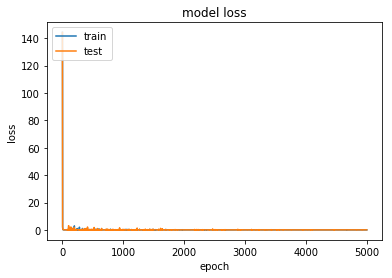

In [84]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Results

[4] The result suggests that ~ shows best performance .... between other method

(-Create table and show the result// Leader bord score.)



### Limitation/Recommendations

[5] Limitations/Recommendations
1. The training data and test dataset have a same length and the performance of the model might be improved that if we can obtain more dataset 

2. We realize that a lot of domain knowledg is requried 

3. Feature enginnering/ other types of model is required


### Conclusion

[6] Fidings from EDA- Which feature was included.. how we engineerined. Model fitting and validity of model tracking down. Our efforts to try to improve the performance. 

### Reference/Resource

[1] https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

[2] https://github.com/Sooyeong/CSE627_project 